In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, load_img
import numpy as np

In [2]:
(x_train, y_train),(x_test, y_test) = load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
print(y_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [5]:
print(x_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [6]:
print(x_test)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [7]:
print(y_test)

[[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [8]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [9]:
# to make it uni-dimensional to make the process simpler

In [10]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [11]:
print(y_train)

[6 9 9 ... 9 1 1]


In [12]:
print(y_test)

[3 8 8 ... 5 1 7]


In [13]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

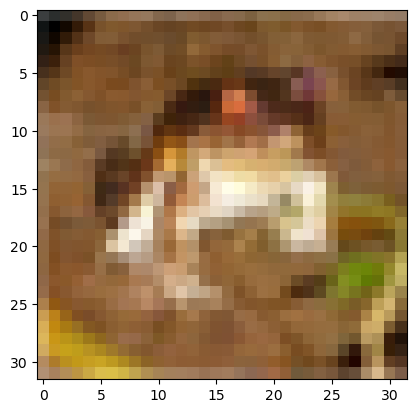

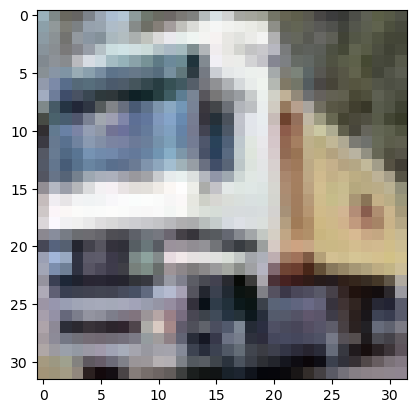

In [14]:
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[1])
plt.show()

In [15]:
class_names[y_train[0]] , class_names[y_train[1]]

('frog', 'truck')

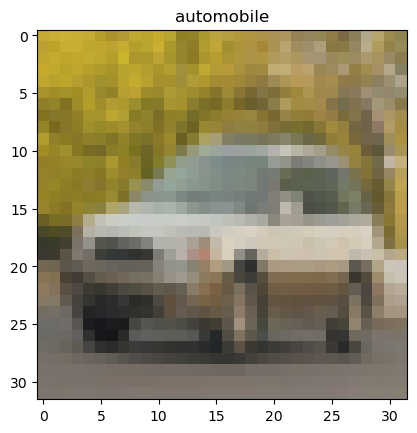

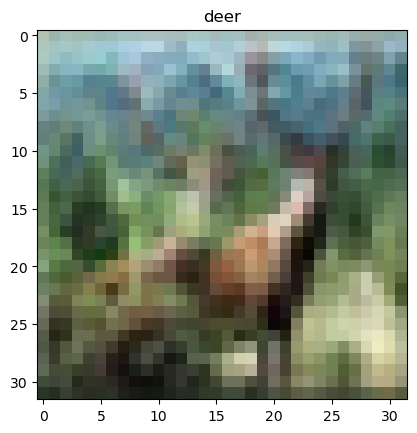

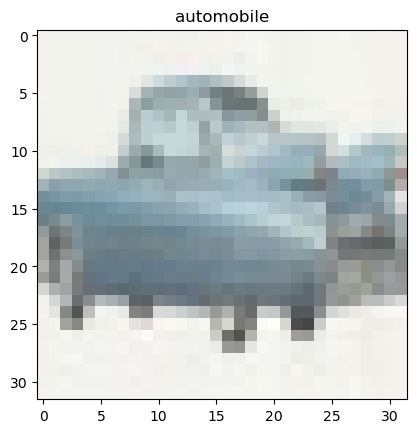

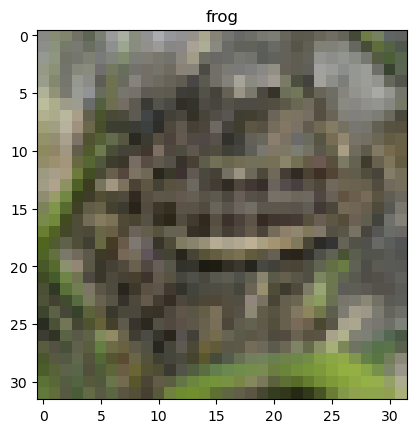

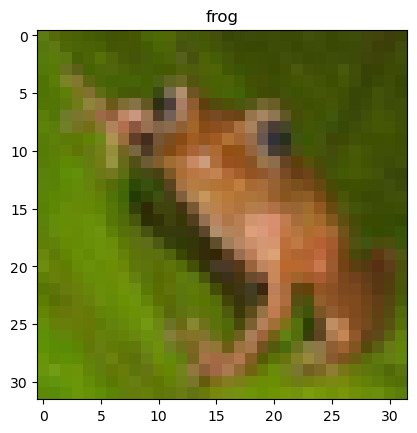

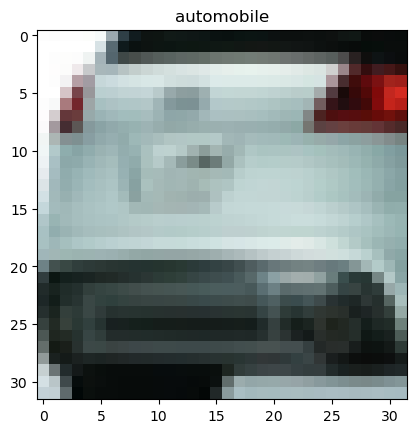

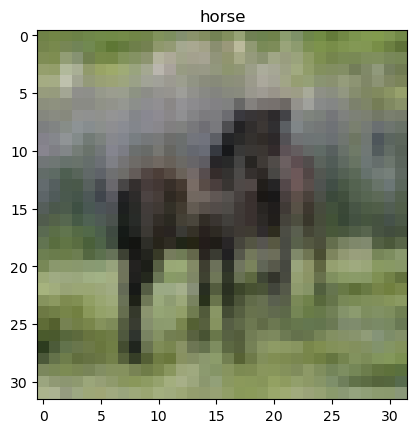

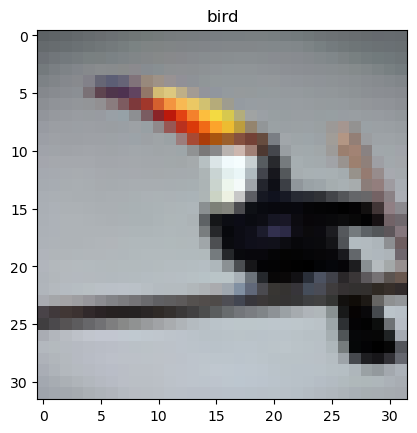

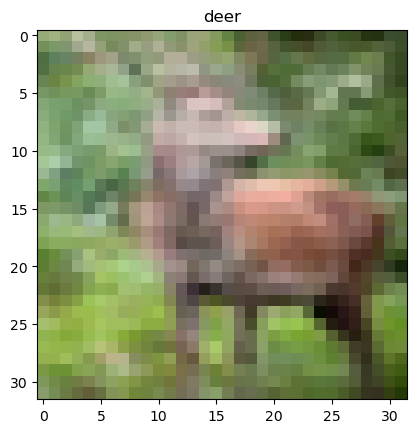

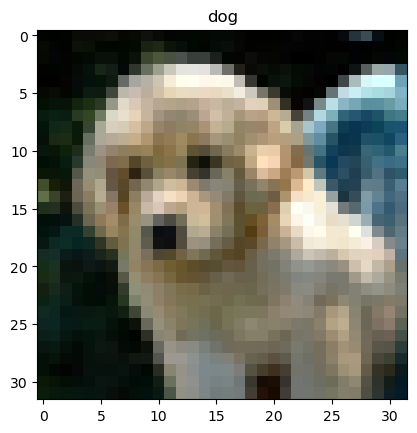

In [16]:
images = np.random.randint(0,50000, 10) # Get random 10 image ids between 0 and 50000
for img_no in images:
    plt.imshow(x_train[img_no])
    plt.title(class_names[y_train[img_no]])
    plt.show()

In [17]:
x_train = x_train.astype(float)/255
x_test = x_test.astype(float)/255

In [18]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [19]:
y_test_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [20]:
y_train_ohe[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

### CNN Model for 10 class classification problem

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation , Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, Adadelta


In [35]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)))
model.add(Conv2D(32, (3,3), activation="relu", padding="same"))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))  # Dropout after pooling

model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dropout(0.5))   # Dropout before output
model.add(Dense(10, activation="softmax"))

C:\Users\469461\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(optimizer = Adam(learning_rate=0.001),
              loss = "categorical_crossentropy", 
              metrics = ["accuracy"])

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)
]

In [37]:
history = model.fit(x=x_train, 
                    y=y_train_ohe, 
                    epochs = 60, 
                    batch_size= 1000, 
                    validation_data = (x_test,y_test_ohe),
                    callbacks=callbacks
                   )

Epoch 1/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 23s 434ms/step - accuracy: 0.2696 - loss: 1.9835 - val_accuracy: 0.4252 - val_loss: 1.6721 - learning_rate: 0.0010
Epoch 2/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 442ms/step - accuracy: 0.3894 - loss: 1.6842 - val_accuracy: 0.4868 - val_loss: 1.4715 - learning_rate: 0.0010
Epoch 3/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 21s 427ms/step - accuracy: 0.4398 - loss: 1.5480 - val_accuracy: 0.5099 - val_loss: 1.3862 - learning_rate: 0.0010
Epoch 4/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 433ms/step - accuracy: 0.4697 - loss: 1.4722 - val_accuracy: 0.5407 - val_loss: 1.3043 - learning_rate: 0.0010
Epoch 5/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 25s 498ms/step - accuracy: 0.4919 - loss: 1.4086 - val_accuracy: 0.5601 - val_loss: 1.2502 - learning_rate: 0.0010
Epoch 6/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 24s 471ms/step - accuracy: 0.5100 - loss: 1.3653 - val_accuracy: 0.5786 - val_loss: 1.2114 - learning_rate: 0.0010
Epoch 7/60
50/50 ━━━━━━━━━━━━━━━━━━━━ 22s 447ms/step - accuracy: 0.5287 - loss: 1.

In [38]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │       819,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,491,364 (9.50 MB)

 Trainable params: 830,454 (3.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,660,910 (6.34 MB)

### Predicting on new images from internet

In [42]:
new_image = load_img(r"C:\Users\469461\Desktop\Data Science Training\Object detcetion project CNN\img.jpg", target_size=(32,32))

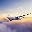

In [43]:
new_image

In [44]:
np.array(new_image).shape


(32, 32, 3)

In [45]:
nw_arr=np.array(new_image)


<function matplotlib.pyplot.show(close=None, block=None)>

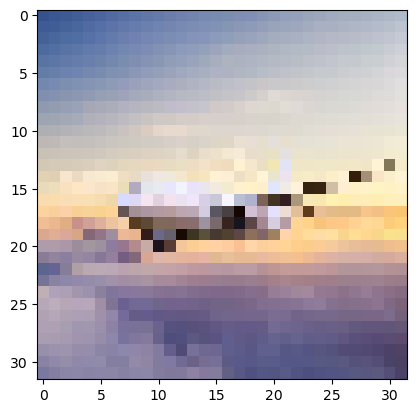

In [46]:
plt.imshow(nw_arr)
plt.show

In [47]:
new_image_array=nw_arr.reshape(1,32,32,3)

In [48]:
## Need to standardize as the training dataset was standardized 
new_image_array = new_image_array/255


In [49]:
preds = model.predict(new_image_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


In [50]:
np.argmax(preds)

np.int64(0)

In [51]:
class_names[np.argmax(preds)]

'airplane'

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img

def predict_top_classes(model, image_path, target_size=(32, 32), class_names=None, top_k=2):
   
    # Load and preprocess the image
    new_image = load_img(image_path, target_size=target_size)
    new_image_array = np.array(new_image)
    
    plt.imshow(new_image_array)
    plt.show()
    
    new_image_array = new_image_array.reshape(1, target_size[0], target_size[1], 3)
    new_image_array = new_image_array / 255.0  # Standardize

    # Generate predictions
    preds = model.predict(new_image_array)

    # Get the top k predictions and their probabilities
    top_indices = np.argsort(preds[0])[::-1][:top_k]
    top_predictions = [(class_names[i] if class_names else str(i), preds[0][i]) for i in top_indices]

    return top_predictions




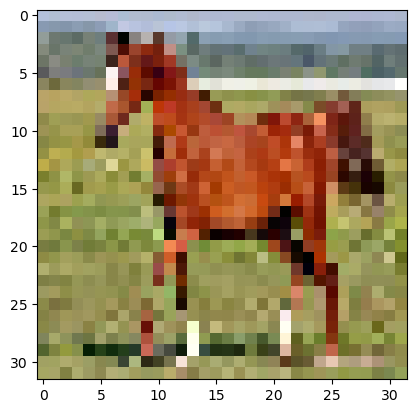

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Top predictions:
horse: 1.00
truck: 0.00
deer: 0.00


In [53]:

image_path = r"C:\Users\469461\Desktop\Data Science Training\Object detcetion project CNN\horse.jpg"
top_predictions = predict_top_classes(model, image_path, class_names=class_names, top_k=3)
print("Top predictions:")

for class_name, probability in top_predictions:
    print(f"{class_name}: {probability:.2f}")


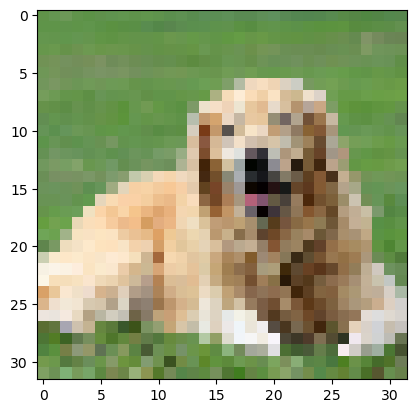

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Top predictions:
dog: 0.57
deer: 0.19
frog: 0.16


In [55]:
image_path = r"C:\Users\469461\Desktop\Data Science Training\Object detcetion project CNN\dog2.webp"
top_predictions = predict_top_classes(model, image_path, class_names=class_names, top_k=3)
print("Top predictions:")

for class_name, probability in top_predictions:
    print(f"{class_name}: {probability:.2f}")

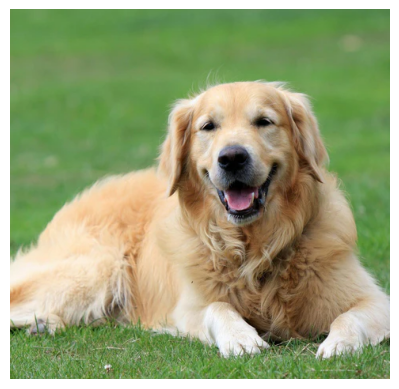

In [57]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread(r"C:\Users\469461\Desktop\Data Science Training\Object detcetion project CNN\dog2.webp")
plt.imshow(img)
plt.axis("off")   # hides axis
plt.show()